# Quantifying Molecular Absorption of a Layer

In [1]:
%load_ext autoreload
%autoreload 2
import os
import warnings
warnings.filterwarnings('ignore')

if os.path.isdir('/home/jovyan/esci345/'):
    os.environ["ARTS_DATA_PATH"] = "/share/share/ESCI345/"
    os.environ["ARTS_XML_ATMO"] = "/share/share/esci345/atmospheres/"
else:
    os.environ["ARTS_DATA_PATH"] = "/Users/wgblumbe/Code/rttools/arts_catalogs/arts-cat-data-snapshot-arts-2.5.8/"
    os.environ["ARTS_XML_ATMO"] = "/Users/wgblumbe/Code/rttools/ESCI345/atmospheres/"
    
import pint
ureg = pint.UnitRegistry()

import proplot as pplt
import numpy as np
import typhon as ty
import absorption_module


# make plot folder, if it is not existing
os.makedirs("plots", exist_ok=True)

#speed of light 
c = ty.constants.c # m/s


## 1. Absorption spectra

Calculate the molecule absorption spectra of  

* $\mathrm{CO_2}$
* $\mathrm{O_2}$
* $\mathrm{CO}$
* $\mathrm{H_2O}$
* $\mathrm{CH_4}$
* $\mathrm{O_3}$
* $\mathrm{N_2O}$
* $\mathrm{N_2}$

for a temperature of 200 K and 300 K.

* How does the spectra change?
* Can you explain the changes?

change the volumetric mixing ratios:

* What happens to the spectra?

change the pressure of the gas:

* What happens to the spectra?

In [12]:
# Define parameters
species = "CFC11"
temperature = 270 # K 
pressure = 101325. # Pa
vmr = 0.00001

fmin = 10 * ureg.Unit('GHz')
fmax = 200 * ureg.Unit("GHz")
fmin = 20 * ureg.Unit('micrometer')
fmax = 4 * ureg.Unit("micrometer")
#fmin = 3000 * ureg.Unit('nanometer')
#fmax = 200 * ureg.Unit("nanometer")
#print(abs_coeff)

## 1.1 Plot a single absorber's absorption coefficient $\beta_a$

In [13]:
# Call ARTS to calculate absorption cross sections
freq, abs_coeff, abs_xsec = absorption_module.calculate_absxsec(species, pressure, temperature, vmr=vmr, 
                                                                  fmin=fmin, fmax=fmax)

# Plot the results.

fig, ax = pplt.subplots(ncols=1, nrows=1, figsize=(9,5))

ax.plot(freq, abs_coeff, label=species)
#ax.legend(loc=0)
fig.format(xlabel=absorption_module.get_spectral_unit(freq), ylabel=r"Absorption Coefficient [$\sf m^{-1}$]",
           grid=True, yformatter='sci', suptitle=f"Absorption Coefficient of {absorption_module.tag2tex(species)} with T={temperature} K and P={pressure/100.} hPa")

fig.savefig(  # Save figure.
    f"plots/plot_abs_coeff.pdf"
)

RuntimeError: User Error: not bands_found and not robust
Error is found at:
Filename:      "/Users/olemke/miniforge3/envs/pyarts-dev/conda-bld/pyarts_1699599495275/work/src/m_absorptionlines.cc"
Function Name: "void abs_lines_per_speciesReadSpeciesSplitCatalog(ArrayOfArrayOfAbsorptionLines &, const ArrayOfArrayOfSpeciesTag &, const String &, const Index &, const Verbosity &)"
Line Number:   898
Column Number: 79
Please follow these instructions to correct your error:
Cannot find any bands in the directory you are reading

## 1.2 Plot the absorption coefficent for several absorbers $\beta_a$

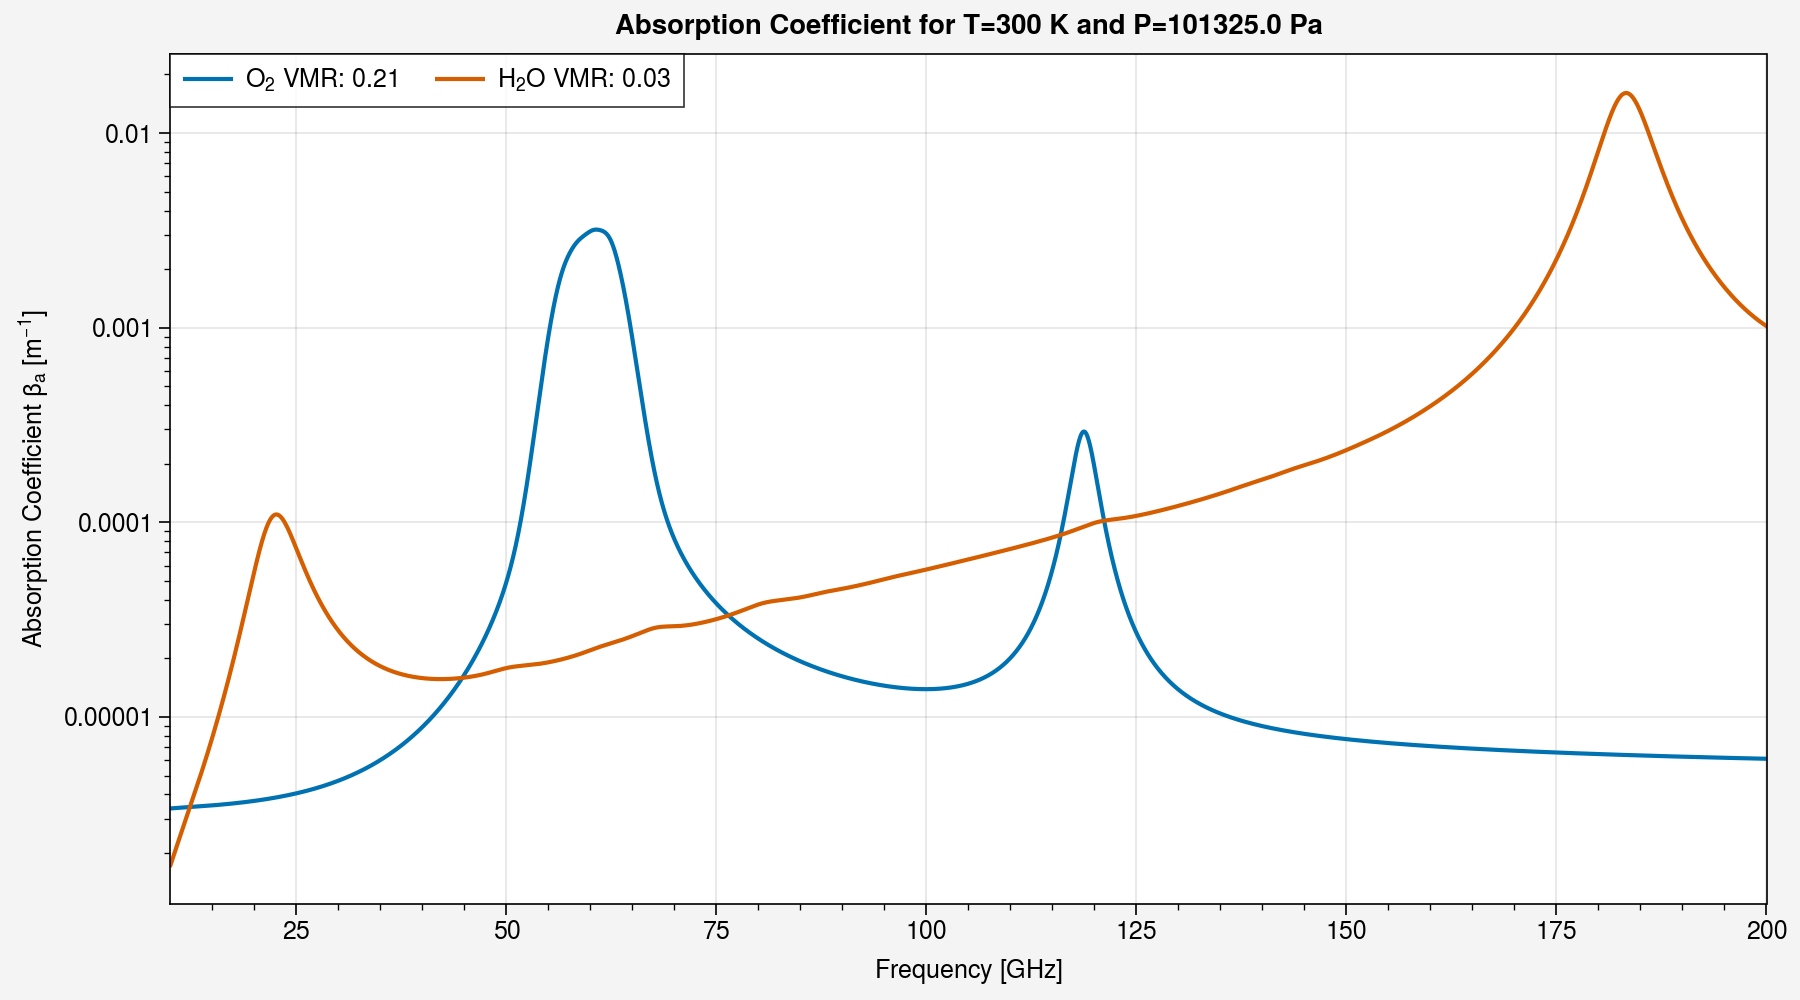

In [26]:
# Plot the results.
species_list = ['O2', "H2O"]
vmrs = [0.21, 0.03]

fig, ax = pplt.subplots(ncols=1, nrows=1, figsize=(9,5))
for species, vmr in zip(species_list, vmrs):
    # Call ARTS to calculate absorption cross sections
    freq, abs_coeff, abs_xsec = absorption_module.calculate_absxsec(species, pressure, temperature, vmr=vmr, 
                                                                      fmin=fmin, fmax=fmax)
    ax.plot(freq, abs_coeff, label=f"{absorption_module.tag2tex(species)} VMR: {vmr}")
ax.legend()
fig.format(xlabel=absorption_module.get_spectral_unit(freq), ylabel=r"Absorption Coefficient $\beta_a$ [$\sf m^{-1}$]",
           yscale='log', grid=True, suptitle=f"Absorption Coefficient for T={temperature} K and P={pressure/100.} hPa")

fig.savefig(  # Save figure.
    f"plots/plot_abs_coeff.pdf"
)

## 1.3 Plot the Molecular Absorption Cross Section  for several absorbers $\sigma_a$

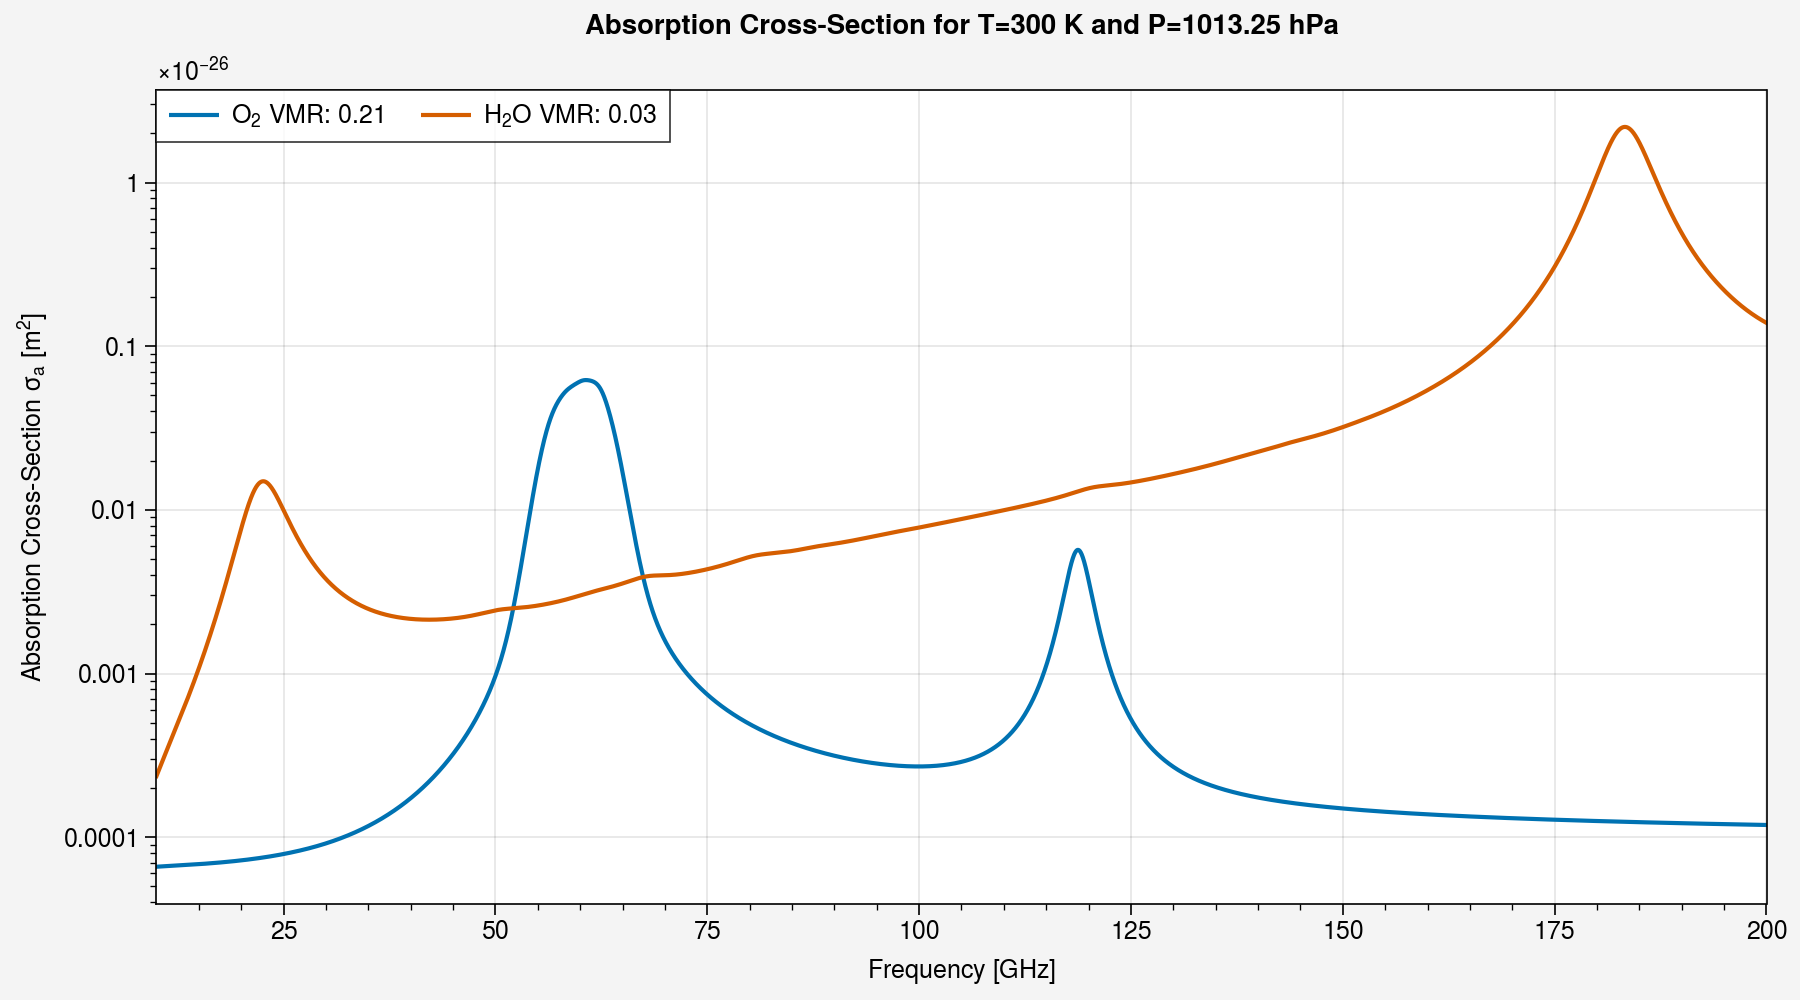

In [27]:
# Plot the results.
species_list = ['O2', "H2O"]
vmrs = [0.21, 0.03]

fig, ax = pplt.subplots(ncols=1, nrows=1, figsize=(9,5))
for species, vmr in zip(species_list, vmrs):
    # Call ARTS to calculate absorption cross sections
    freq, abs_coeff, abs_xsec = absorption_module.calculate_absxsec(species, pressure, temperature, vmr=vmr, 
                                                                      fmin=fmin, fmax=fmax)
    ax.plot(freq, abs_xsec, label=f"{absorption_module.tag2tex(species)} VMR: {vmr}")
ax.legend()
fig.format(xlabel=absorption_module.get_spectral_unit(freq), ylabel=r"Absorption Cross-Section $\sigma_a$ [$m^{2}$]",
           yscale='log', grid=True, suptitle=f"Absorption Cross-Section for T={temperature} K and P={pressure/100.} hPa")

fig.savefig(  # Save figure.
    f"plots/plot_abs_xsec_coeff.pdf"
)

## 1.3 Plot the Mass Absorption Coefficent for several absorbers $k_a$

5.312966959986718e-26 O2
2.991864519342521e-26 H2O


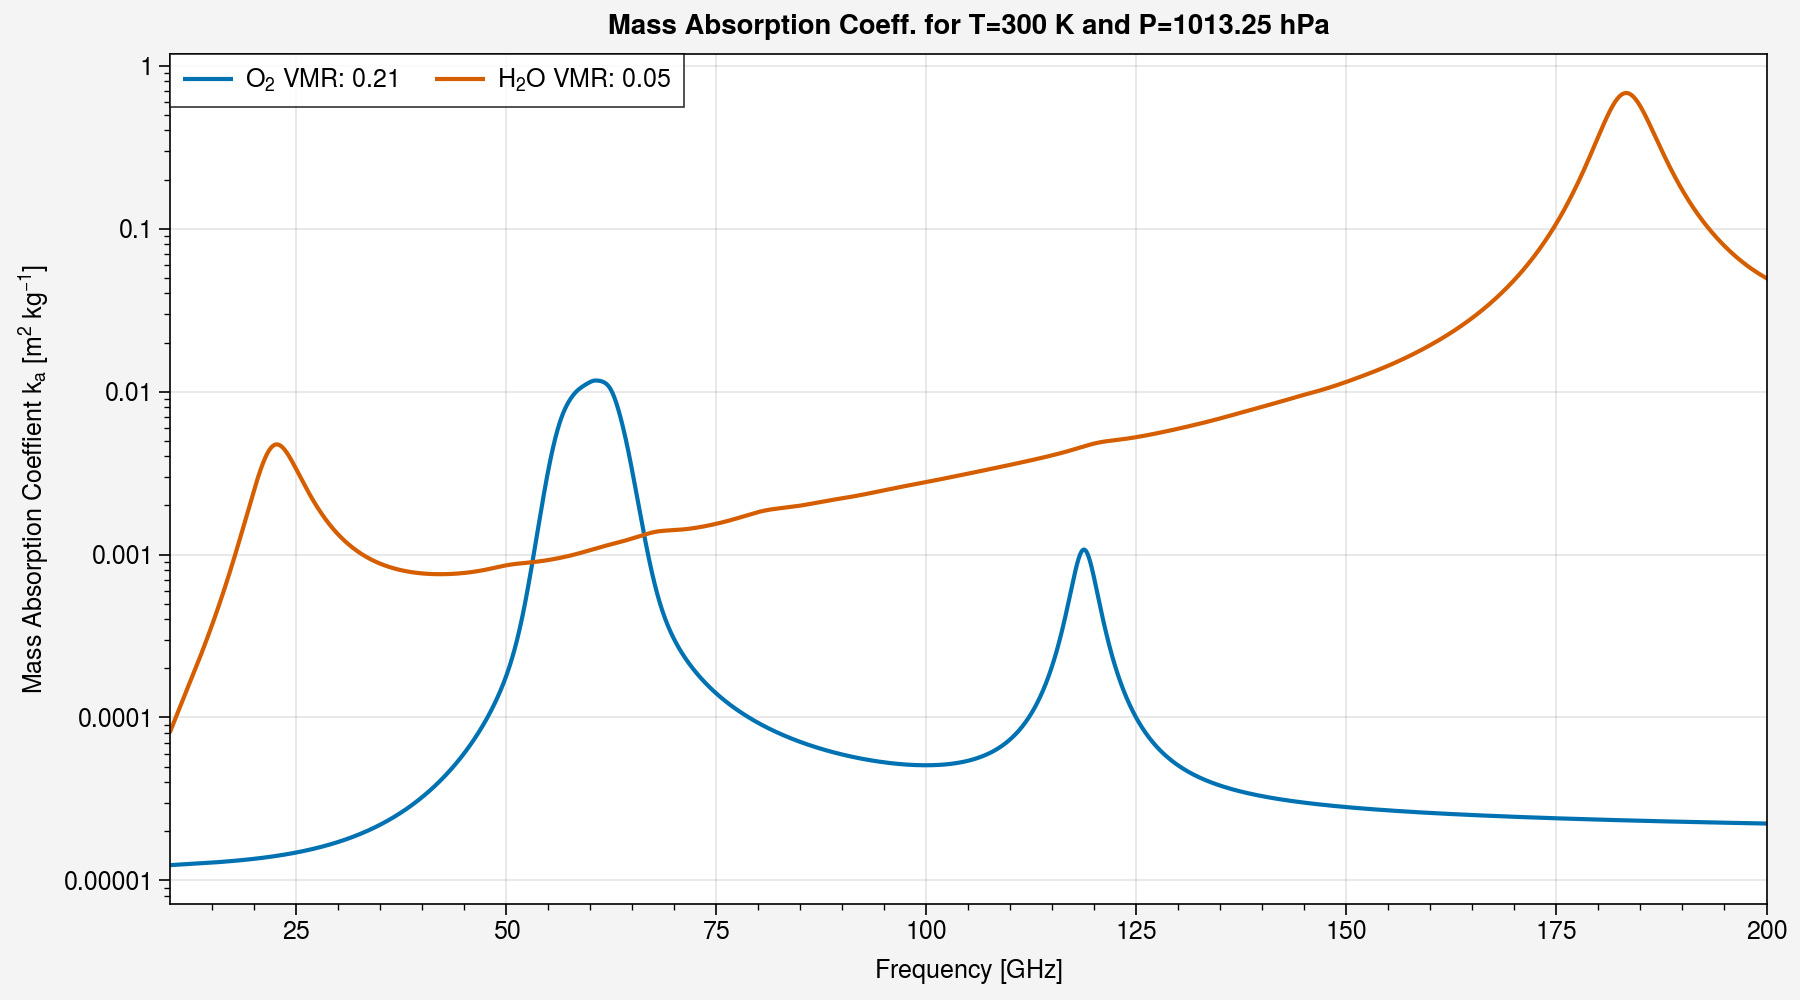

In [37]:
# Plot the results.
N_a = 6.023e23 # mol-1

species_list = ['O2', "H2O"]
vmrs = [0.21, 0.05]

fig, ax = pplt.subplots(ncols=1, nrows=1, figsize=(9,5))
for species, vmr in zip(species_list, vmrs):
    molarmass = absorption_module.molecular_weights[species] # g/mol
    mass_of_molecule = molarmass / (1000 * N_a) # (g/mol) / (1 molecule / mol)
    # Call ARTS to calculate absorption cross sections
    freq, abs_coeff, abs_xsec = absorption_module.calculate_absxsec(species, pressure, temperature, vmr=vmr, 
                                                                      fmin=fmin, fmax=fmax)
    ax.plot(freq, abs_xsec/mass_of_molecule, label=f"{absorption_module.tag2tex(species)} VMR: {vmr}")
    
ax.legend()
fig.format(xlabel=absorption_module.get_spectral_unit(freq), ylabel=r"Mass Absorption Coeffient $k_a$ [$m^{2}\ kg^{-1}$]",
           yscale='log', grid=True, suptitle=f"Mass Absorption Coeff. for T={temperature} K and P={pressure/100.} hPa")

fig.savefig(  # Save figure.
    f"plots/plot_mass_abs_coeff.pdf"
)

# 2. Path-Dependent Absorption Variables

The optical depth $\tau$ and transmissivity $t$ variables are dependent on the path length $s$.  

## 2.1 Plot the Optical Depth $\tau$ for a single species

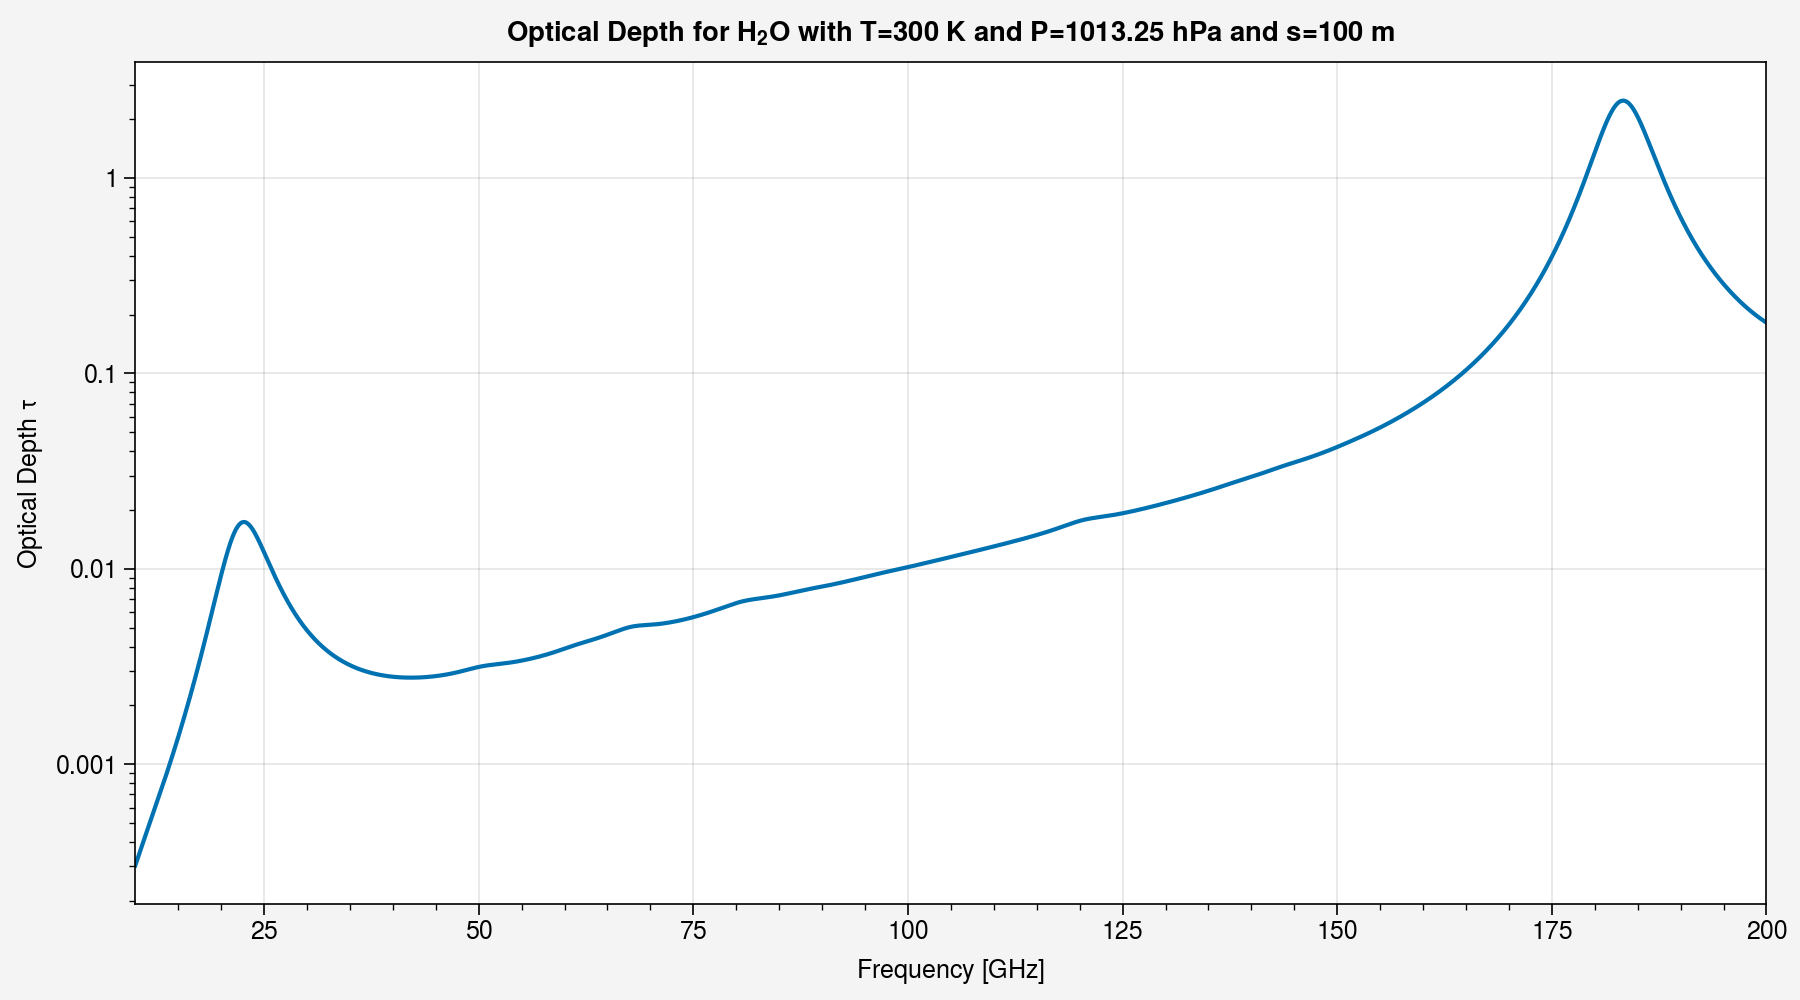

In [56]:
# Plot the results.

freq, abs_coeff, abs_xsec = absorption_module.calculate_absxsec(species, pressure, temperature, vmr=vmr, 
                                                                  fmin=fmin, fmax=fmax)
s = 100 #meters

fig, ax = pplt.subplots(ncols=1, nrows=1, figsize=(9,5))

ax.plot(freq, abs_coeff*s, label=species)
#ax.legend(loc=0)
fig.format(xlabel=absorption_module.get_spectral_unit(freq), ylabel=r"Optical Depth $\tau$",
           yscale='log', grid=True, suptitle=f"Optical Depth for {absorption_module.tag2tex(species)} with T={temperature} K and P={pressure/100.} hPa and s={s} m")

fig.savefig(  # Save figure.
    f"plots/plot_optical_depth.pdf"
)

## 2.1 Plot the transmissivity for a single absorber $t$

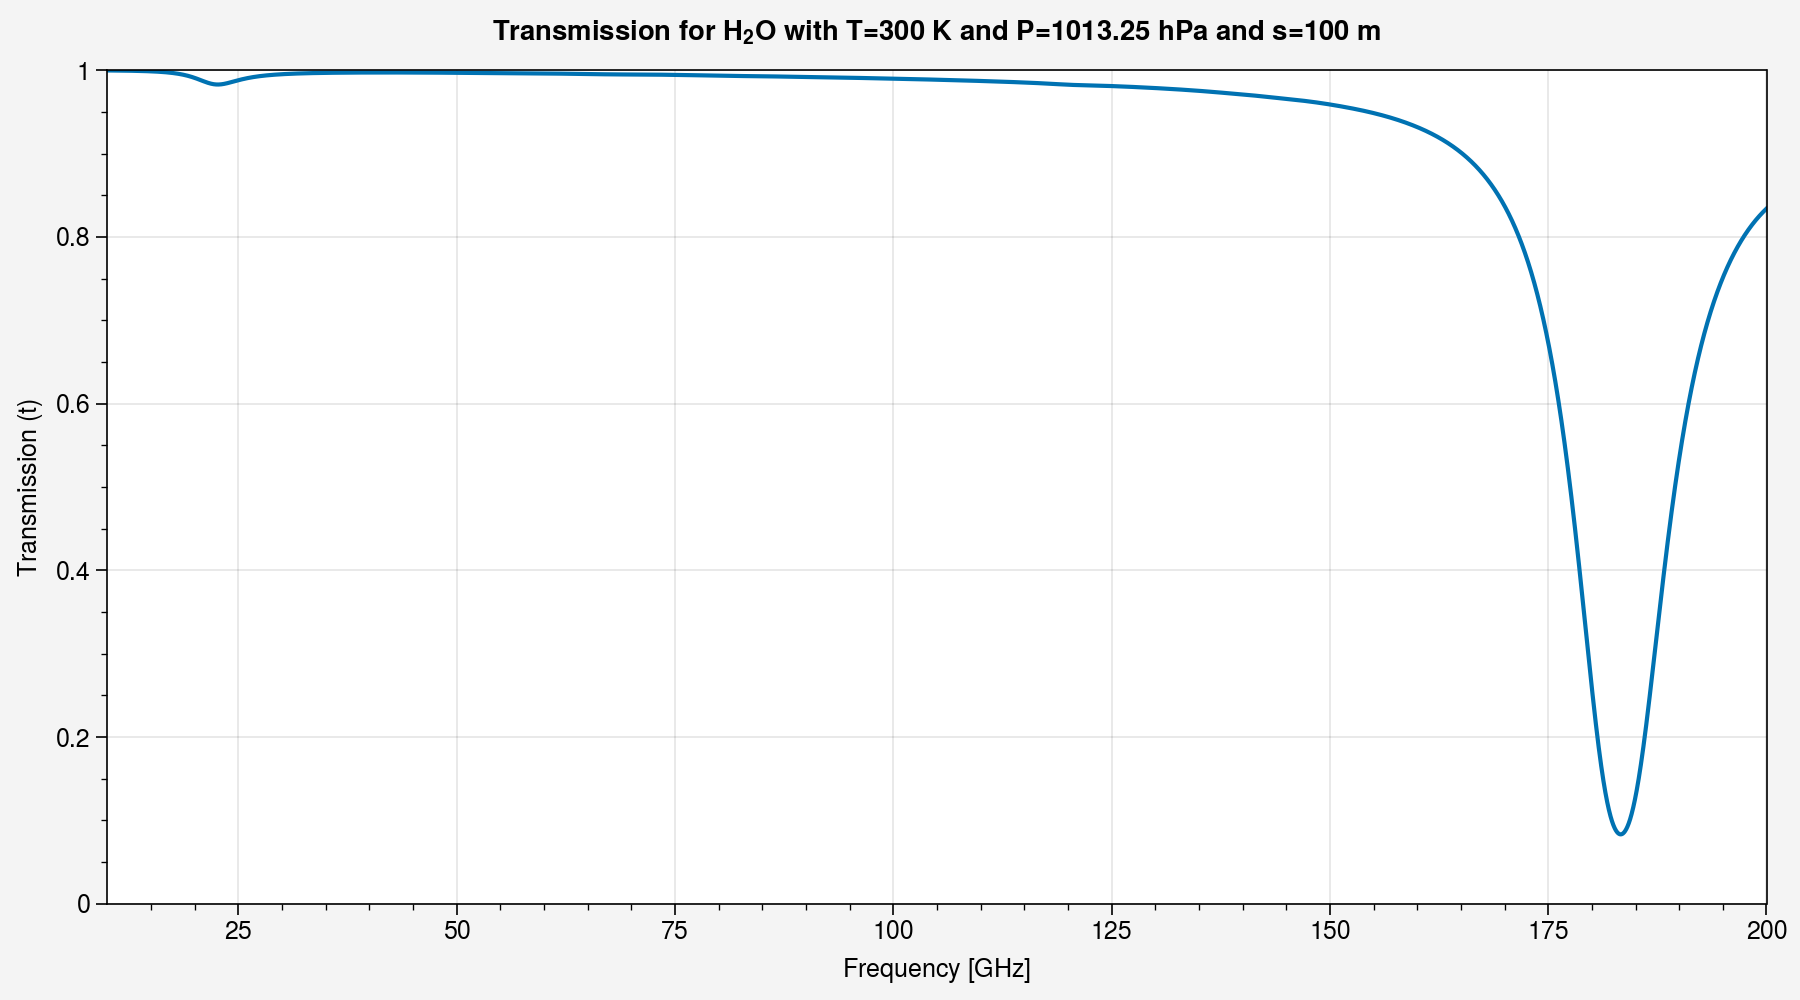

In [55]:
# Plot the results.
freq, abs_coeff, abs_xsec = absorption_module.calculate_absxsec(species, pressure, temperature, vmr=vmr, 
                                                                  fmin=fmin, fmax=fmax)

fig, ax = pplt.subplots(ncols=1, nrows=1, figsize=(9,5))

ax.plot(freq, np.exp(-abs_coeff.magnitude*s), label=species)
#ax.legend(loc=0)
fig.format(xlabel=absorption_module.get_spectral_unit(freq), ylabel=r"Transmission ($t$)",
           ylim=(0,1), grid=True, suptitle=f"Transmission for {absorption_module.tag2tex(species)} with T={temperature} K and P={pressure/100.} hPa and s={s} m")

fig.savefig(  # Save figure.
    f"plots/plot_transmission.pdf"
)